In [1]:
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
pal = sns.color_palette()

df_train = pd.read_csv("RawData/train.csv")
df_test = pd.read_csv("RawData/test.csv")

train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

# Basic Statistics

Total number of question pairs for training: 404290
Duplicate pairs: 404290
Dupicate percentage: 0.37%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780


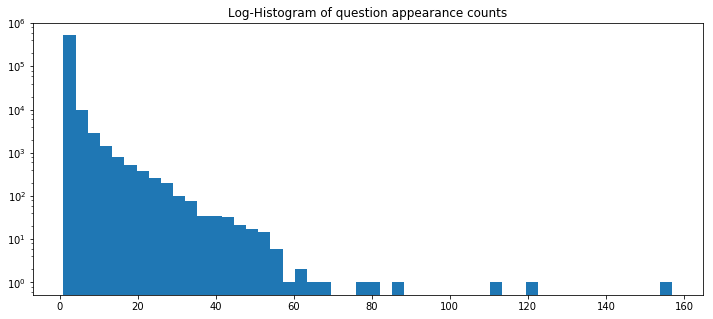

In [2]:
Pairs = len(df_train)
Duplicates = len([item for item in df_train['is_duplicate'] if item == 1])
DuplicatePercentage = round(Duplicates/Pairs,2)
# DuplicatePercentage = round(df_train['is_duplicate'].mean()*100,2)
Queries = df_train['qid1'].tolist()+df_train['qid2'].tolist()

print('Total number of question pairs for training: {}'.format(Pairs))
print('Duplicate pairs: {}'.format(Pairs))
print('Dupicate percentage: {}%'.format(DuplicatePercentage))
print('Total number of questions in the training data: {}'.format(len(set(Queries))))
print('Number of questions that appear multiple times: {}'.format(sum(pd.Series(Queries).value_counts()>1)))

plt.figure(figsize=(12, 5))
plt.hist(pd.Series(Queries).value_counts(), bins=50)
plt.yscale('log',nonposy='clip')     ##linear or log, nonposy = nonpositive value(= mak or clip)
plt.title('Log-Histogram of question appearance counts')
plt.show()

####To validate the chart
# print(sum(pd.Series(Queries).value_counts()==1))
# print(sum(pd.Series(Queries).value_counts()==2))
# print(sum(pd.Series(Queries).value_counts()==3))
# print(sum(pd.Series(Queries).value_counts()==4))

# print(np.log10(sum(pd.Series(Queries).value_counts()==1)))
# print(np.log10(sum(pd.Series(Queries).value_counts()==2)))
# print(np.log10(sum(pd.Series(Queries).value_counts()==3)))
# print(np.log10(sum(pd.Series(Queries).value_counts()==4)))

# Average As Prediction

In [4]:
from sklearn.metrics import log_loss

p = np.average(df_train['is_duplicate'])
log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p)


### self-write logloss function
def losslog(actual, predict):
    predict = min(max(predict, 1e-15), (1 - (1e-15)))
    if actual == 1:
        return np.log(predict)
    else:
        return np.log(1-predict)
## sum(actual * log(predicted) + (1 - actual) * log(1 - predicted)) / length(actual)
# -log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))
predict = np.average(df_train['is_duplicate'])
print(predict)
Logloss = np.average([-losslog(actual, predict) for actual in df_train['is_duplicate']])
print(Logloss)

0.369197853026
0.658527383984


# Characters Statistics

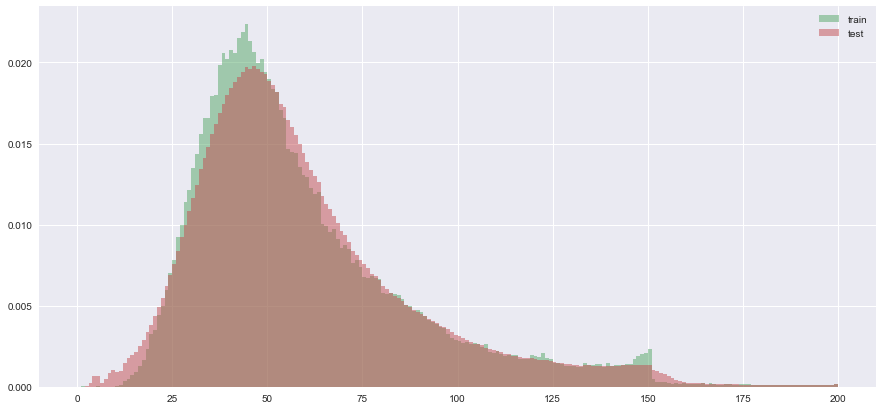

In [7]:
##characters statistics

train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)

plt.figure(figsize=(15,7))
plt.hist(dist_train,bins=200,range=[0,200],color=pal[1],normed = True,alpha=0.5, label = 'train')     ##alpha = transparency(opacity)
plt.hist(dist_test,bins=200,range=[0,200],color=pal[2],normed = True,alpha=0.5, label='test')
plt.legend()
plt.show()

# Words Statistics

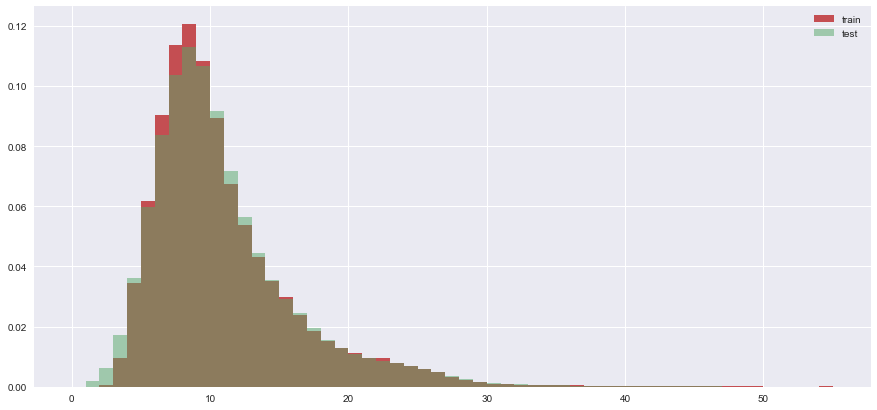

In [8]:
##words
from sklearn.feature_extraction.text import CountVectorizer

Tokenizer= CountVectorizer().build_tokenizer()

dist_train = train_qs.apply(Tokenizer).apply(len)
dist_test = test_qs.apply(Tokenizer).apply(len)

plt.figure(figsize=(15,7))
plt.hist(dist_train, bins=55, normed=True, range=[0,55], label='train', color=pal[2] )
plt.hist(dist_test, bins=55, normed=True, range=[0,55], label='test',alpha = 0.5, color=pal[1])
plt.legend()
plt.show()

# WordCloud

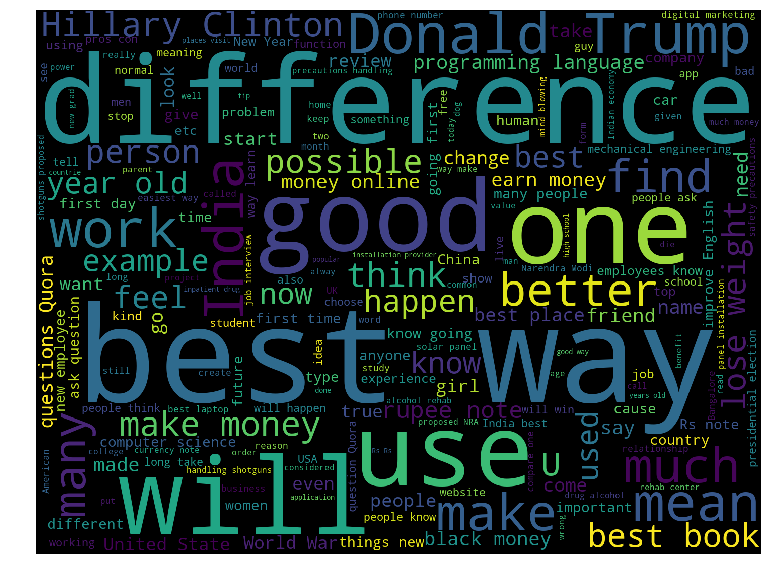

In [9]:
##WordCloud
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs))  #directly input the whole document
plt.figure(figsize=(20, 10))    #set the size of output img
plt.imshow(cloud)    #matplotlib.pylab(as plt) show img using imshow(img)
plt.axis('off')   #make axis transparent
plt.show()  #show the img


# Special Char Statistics

In [10]:

qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%
